In [2]:
from zipfile import ZipFile
import py7zr

In [10]:
dataset = 'cifar-10.zip'

with ZipFile(dataset,'r') as zip:
    zip.extractall()
    print('The dataset is extract')

The dataset is extract


In [11]:
archive = py7zr.SevenZipFile('train.7z', mode='r')
archive.extractall()
archive.close()

In [12]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [15]:
filename = os.listdir('train')

In [16]:
type(filename)

list

In [17]:
print(filename[0:5])
print(filename[-5:])

['1.png', '10.png', '100.png', '1000.png', '10000.png']
['9995.png', '9996.png', '9997.png', '9998.png', '9999.png']


### Label processing

In [18]:
labels = pd.read_csv('trainLabels.csv')

In [19]:
labels.shape

(50000, 2)

In [23]:
labels[0:5]

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [24]:
labels[labels['id'] == 7796]

,id,label
7795,7796,frog


In [31]:
labels['label'].unique()
labels['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [32]:
label_dic = {'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}

label = [label_dic[i] for i in labels['label']]

In [33]:
print(label[0:5])

[6, 9, 9, 4, 1]


In [34]:
print(label[-5:])

[2, 6, 9, 1, 1]


In [35]:
# Displaying image using opencv
import cv2

In [40]:
img = cv2.imread('train/45888.png')

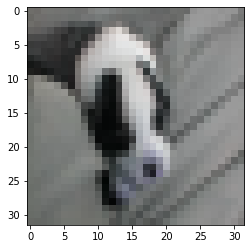

In [41]:
plt.imshow(img)

In [77]:
# separate the id 
id_list = list(labels['id'])

In [78]:
print(id_list[0:5])

[1, 2, 3, 4, 5]


### Image Processing step

In [44]:
train_data_folder = 'train/'

In [47]:
data = []
for id in id_list:
    image = Image.open(train_data_folder + str(id) + '.png')
    
    # convert image to numpy array
    image = np.array(image)
    
    # array image add in data dict.
    data.append(image)
    
    #image_path = train_data_folder + str(id) + '.png'
    #print(image_path)
    
    #if id >= 5:
     #   break

In [75]:
len(data)
#type(data[0])
#data[0].shape

50000

In [79]:
X = np.array(data)
Y = np.array(label)

In [80]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


### Now, split the data into train and test

In [81]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [82]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (40000,) (10000,)


### Scaling the data in order to improve neural network performance

In [83]:
x_train_scale = x_train / 255
x_test_scale = x_test / 255

In [84]:
x_train_scale[0]

array([[[0.81960784, 0.82352941, 0.79607843],
        [0.83529412, 0.83921569, 0.81960784],
        [0.85490196, 0.85882353, 0.84313725],
        ...,
        [0.49803922, 0.29019608, 0.15294118],
        [0.47843137, 0.26666667, 0.1372549 ],
        [0.45490196, 0.24705882, 0.1254902 ]],

       [[0.82352941, 0.82352941, 0.79215686],
        [0.83529412, 0.83921569, 0.81176471],
        [0.85490196, 0.8627451 , 0.83921569],
        ...,
        [0.48627451, 0.2745098 , 0.1372549 ],
        [0.4745098 , 0.2627451 , 0.12941176],
        [0.48235294, 0.27058824, 0.14117647]],

       [[0.80784314, 0.80392157, 0.76470588],
        [0.81960784, 0.81960784, 0.79215686],
        [0.83529412, 0.84313725, 0.81960784],
        ...,
        [0.48627451, 0.2745098 , 0.14509804],
        [0.51372549, 0.30196078, 0.16470588],
        [0.51372549, 0.30588235, 0.16078431]],

       ...,

       [[0.49803922, 0.42352941, 0.38039216],
        [0.54117647, 0.47843137, 0.43137255],
        [0.55294118, 0

### Building the neural network

In [85]:
import tensorflow as tf
from tensorflow import keras

In [86]:
num_of_classes_in_dataset = 10

In [87]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [88]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [89]:
# Training the neural network
model.fit(x_train_scale, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 37s 14ms/step - loss: 1.9546 - accuracy: 0.2934 - val_loss: 1.8182 - val_accuracy: 0.3402
Epoch 2/10
1125/1125 [==============================] - 10s 8ms/step - loss: 1.7923 - accuracy: 0.3536 - val_loss: 1.7758 - val_accuracy: 0.3417
Epoch 3/10
1125/1125 [==============================] - 9s 8ms/step - loss: 1.7478 - accuracy: 0.3733 - val_loss: 1.7060 - val_accuracy: 0.3735
Epoch 4/10
1125/1125 [==============================] - 9s 8ms/step - loss: 1.7188 - accuracy: 0.3838 - val_loss: 1.6872 - val_accuracy: 0.3772
Epoch 5/10
1125/1125 [==============================] - 10s 9ms/step - loss: 1.6955 - accuracy: 0.3929 - val_loss: 1.6682 - val_accuracy: 0.4030
Epoch 6/10
1125/1125 [==============================] - 10s 9ms/step - loss: 1.6766 - accuracy: 0.4003 - val_loss: 1.6774 - val_accuracy: 0.3935
Epoch 7/10
1125/1125 [==============================] - 13s 11ms/step - loss: 1.6658 - accuracy: 0.4049 - val_loss: 1.6586 - val_ac

### Now, we use ResNet50 with pre-trained model for improving performance

In [93]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [99]:
convolutional_base = ResNet50(weights = 'imagenet', include_top=False, input_shape=(256,256,3))

94765736/94765736 [==============================] - 96s 1us/step


In [100]:
convolutional_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 64, 64, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 8, 8, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 8, 8, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

### Now, add our model to this resnet50 model to get better accuracy

In [103]:
model = models.Sequential()


# 1. You are scaling up image here by 2 time width and 2 time height i.e (if img has 32 bits then after layer of upsampling
#    2D, the img will have 64 bits, [32 x 2, 32 x 2])
# 2. You are doing UpSampling2D 3 times here because the resnet50 is trained on 256 x 256 pixel.
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))

model.add(convolutional_base)

# Hidden layer 1
model.add(Flatten())
model.add(layers.BatchNormalization())

# Hidden layer 2
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

# Hidden layer 3
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

# Output layer
model.add(layers.Dense(10, activation='softmax'))

In [107]:
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metircs=['accuracy'])
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(x_train_scale, y_train, validation_split=0.1, epochs=3)